# Práctico 1 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Esta función realiza el producto de matrices.
def apply_matrix(img, M): 
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape) 

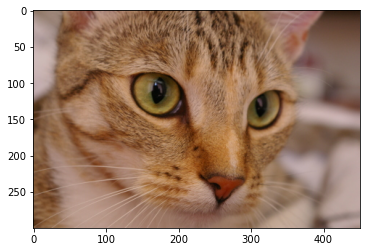

In [3]:
# Cargar la imagen
img_rgb = imageio.imread('imageio:chelsea.png')/255 # El 255 es para normalizar en [0,1] los pixeles. 
                                                    # Necesario para conversion de matrices.

# Formato de la imagen: (fila,columna,canal).
# Con img_rgb.shape vemos estas 3 componentes con sus cantidades respectivas.

# Mostrar la imagen
plt.imshow(img_rgb)

## Seleccionar el canal rojo

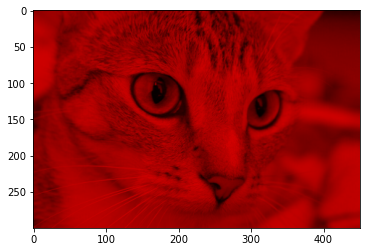

In [4]:
# Para definir matrices, como matlab.

M = np.array([[1, 0, 0], 
              [0, 0, 0], 
              [0, 0, 0]])

# se realiza => [R';G';B'] = M * [R;G;B] (por la cuenta de matriz, solo queda el canal rojo)

img_canal_rojo = apply_matrix(img_rgb, M)

plt.imshow(img_canal_rojo)

## Imagen en escala de grises

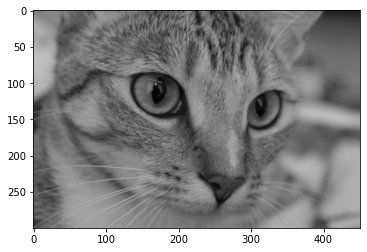

In [5]:

# Matriz de unos (de 3x3).
M = np.ones((3,3))/3

# esto provoca el promedio de cada terna RGB en cada pixel.
img_gris = apply_matrix(img_rgb, M)

plt.imshow(img_gris)

El codigo de arriba produce un solo valor por pixel. En ese caso, existen diversas interpretaciones, ya que el 0 puede ser negro y el 1 blanco (por ejemplo). Esto depende de la paleta que se quiera utilizar. En este caso, por defecto es en escala de gris.

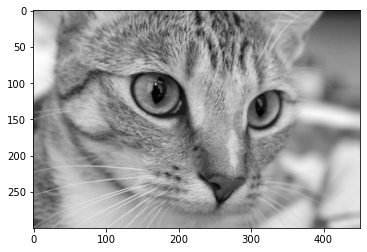

In [6]:

# Los : permiten seleccionar todas las filas y todas las col y solamente el canal 0. (tercer componente elige el canal RGB)
# Primera y segunda componente elige filas y columnas.
img_gris_2 = img_gris[:,:,0]

plt.imshow(img_gris_2, 'gray')

## Otros mapas de colores

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

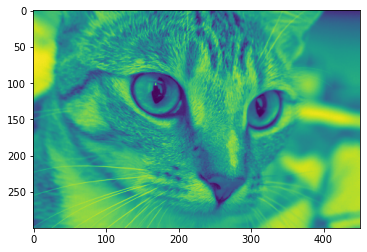

In [7]:
plt.imshow(img_gris_2)

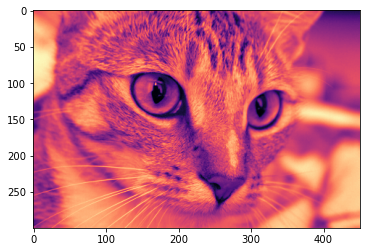

In [8]:
plt.imshow(img_gris_2, 'magma')

## Matriz aleatoria

[[0.00173168 0.51388558 0.54750276]
 [0.10900078 0.69476501 0.62685527]
 [0.38596081 0.04027786 0.8596172 ]]


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

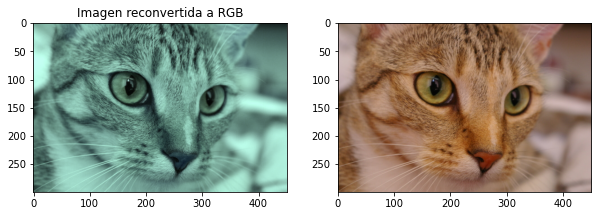

In [9]:
M = np.random.rand(3, 3)

img_random = apply_matrix(img_rgb, M)

M_inv = np.linalg.inv(M)
img_random_inv = apply_matrix(img_random, M_inv)

print(M)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title('Matriz aleatoria')
axes[1].imshow(np.clip(img_random_inv, 0, 1))
axes[0].set_title('Imagen reconvertida a RGB')

## 1. Intercambiar los canales: R->G, G->B, B->R

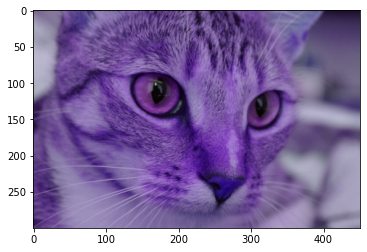

In [16]:
# Se define la matriz tal que: Mx*[R;G;B] = [G;B;R]
Mx = np.array([[0, 1, 0], 
              [0, 0, 1], 
              [1, 0, 0]])

img_intercambiada = apply_matrix(img_rgb, Mx)

plt.imshow(img_intercambiada)

## 2. Operaciones en el espacio YIQ

1. Convertir la imagen de RGB a YIQ
2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ por $\beta>=0$
3. Convertir la imagen de YIQ a RGB
4. Truncar los valores RGB al rango \[0,1\] (utilizar np.clip)
5. Mostrar la imagen original y la imagen procesada

Text(0.5, 1.0, 'Imagen procesada en YIQ y convertida a RGB')

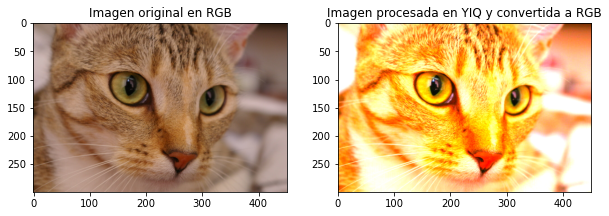

In [15]:
# 1:
 
M_toYIQ = np.array([[0.299, 0.586, 0.114], 
                   [0.59716, -0.274453, -0.321263], 
                   [0.21456, -0.522591, 0.311135]]) 

img_YIQ = apply_matrix(img_rgb, M_toYIQ)

# 2:

alfa = 2
beta = 4
My = np.array([[alfa, 0, 0], 
                [0, beta, 0], 
                [0, 0, beta]]) 

img_YIQ = apply_matrix(img_YIQ, My)

"""
Otra manera mas sencilla: img_YIQ[:,:,0]= alfa * img_YIQ[:,:,0]
                          img_YIQ[:,:,0]= beta * img_YIQ[:,:,1]
                          img_YIQ[:,:,0]= beta * img_YIQ[:,:,2]

Se multiplican todos los pixeles del canal 0 (Y) por el alfa y se los asigna a todos los pixeles del canal 0 de la nueva imagen.


"""
# 3:

M_toRGB = np.linalg.inv(M_toYIQ)
img_RGB_proc = apply_matrix(img_YIQ, M_toRGB)
img_RGB_proc = np.clip(img_RGB_proc, 0, 1) # Se normaliza a [0,1] la imagen.

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb)
axes[0].set_title('Imagen original en RGB')
axes[1].imshow(img_RGB_proc)
axes[1].set_title('Imagen procesada en YIQ y convertida a RGB')




## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

<IPython.core.display.Javascript object>


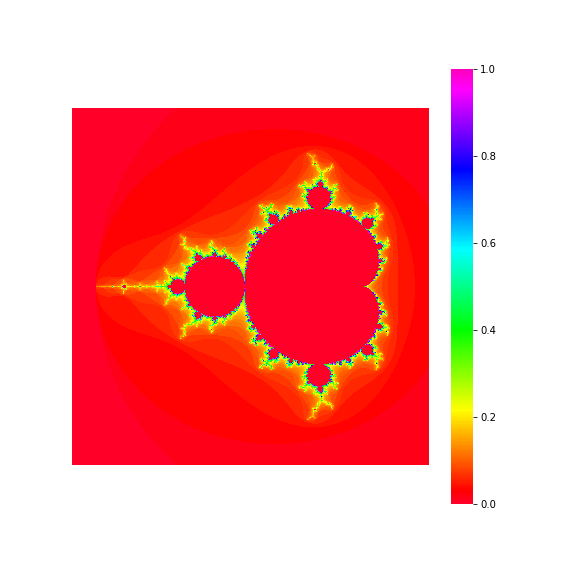

<AxesSubplot:>

In [52]:
import seaborn as sns
%matplotlib notebook

x = np.load('mandelbrot.npy')

fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='gist_rainbow', square=True, xticklabels=False, yticklabels=False)

